In [8]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb

import os
import pandas as pd
import numpy as np
import datetime

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

### get wine data

In [9]:
# get sample data from uci dataset archive

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

wine = pd.read_csv( url , sep=';' )

In [10]:
# this dataframe has 1599 rows and 12 columns

wine.shape

(1599, 12)

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [12]:
# show average alcohol content for this dataframe

wine.alcohol.mean()

10.422983114446502

In [13]:
# get the mean of alcohol without using the built in function

count = 0

for i in wine.alcohol:
    count = count+i
    
count/len(wine)    

10.422983114446502

In [15]:
# get more indicators about the alcohol variable

wine.alcohol.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

### using built-in methods on groupby object

In [17]:
# create a groupby object which groups data by the quality

wine_qual = wine.groupby(wine.quality)

In [21]:
wine_qual.describe().head(10)

alcohol  chlorides  citric acid    density  fixed acidity  \
quality                                                                      
3       count  10.000000  10.000000    10.000000  10.000000      10.000000   
        mean    9.955000   0.122500     0.171000   0.997464       8.360000   
        std     0.818009   0.066241     0.250664   0.002002       1.770875   
        min     8.400000   0.061000     0.000000   0.994710       6.700000   
        25%     9.725000   0.079000     0.005000   0.996150       7.150000   
        50%     9.925000   0.090500     0.035000   0.997565       7.500000   
        75%    10.575000   0.143000     0.327500   0.998770       9.875000   
        max    11.000000   0.267000     0.660000   1.000800      11.600000   
4       count  53.000000  53.000000    53.000000  53.000000      53.000000   
        mean   10.265094   0.090679     0.174151   0.996542       7.779245   

               free sulfur dioxide         pH  qual / alc ratio  \
quality                                                           
3       count            10.000000  10.000000         10.000000   
        mean             11.000000   3.398000          0.303286   
        std               9.763879   0.144052          0.026206   
        min               3.000000   3.160000          0.272727   
        25%               5.000000   3.312500          0.283810   
        50%               6.000000   3.390000          0.302269   
        75%              14.500000   3.495000          0.308489   
        max              34.000000   3.630000          0.357143   
4       count            53.000000  53.000000         53.000000   
        mean             12.264151   3.381509          0.392724   

               residual sugar  sulphates  total sulfur dioxide  \
quality                                                          
3       count       10.000000  10.000000             10.000000   
        mean         2.635000   0.570000             24.900000   
        std          1.401596   0.122020             16.828877   
        min          1.200000   0.400000              9.000000   
        25%          1.875000   0.512500             12.500000   
        50%          2.100000   0.545000             15.000000   
        75%          3.100000   0.615000             42.500000   
        max          5.700000   0.860000             49.000000   
4       count       53.000000  53.000000             53.000000   
        mean         2.694340   0.596415             36.245283   

               volatile acidity  
quality                          
3       count         10.000000  
        mean           0.884500  
        std            0.331256  
        min            0.440000  
        25%            0.647500  
        50%            0.845000  
        75%            1.010000  
        max            1.580000  
4       count         53.000000  
        mean           0.693962

In [19]:
wine_qual.max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qual / alc ratio
quality,,,,,,,,,,,,
3,11.6,1.580,0.66,5.7,0.267,34,49,1.00080,3.63,0.86,11.0,0.357143
4,12.5,1.130,1.00,12.9,0.610,41,119,1.00100,3.90,2.00,13.1,0.444444
5,15.9,1.330,0.79,15.5,0.611,68,155,1.00315,3.74,1.98,14.9,0.588235
6,14.3,1.040,0.78,15.4,0.415,72,165,1.00369,4.01,1.95,14.0,0.714286
7,15.6,0.915,0.76,8.9,0.358,54,289,1.00320,3.78,1.36,14.0,0.760870
8,12.6,0.850,0.72,6.4,0.086,42,88,0.99880,3.72,1.10,14.0,0.816327


In [22]:
wine_qual.count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qual / alc ratio
quality,,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18,18


In [29]:
wine_qual.sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qual / alc ratio
quality,,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110,249,9.97464,33.98,5.70,99.550000,3.032863
4,412.3,36.780,9.23,142.80,4.806,650,1921,52.81675,179.22,31.61,544.050000,20.814386
5,5561.9,392.965,165.95,1722.15,63.153,11566,38486,679.02757,2250.67,422.88,6741.700000,345.657007
6,5325.5,317.395,174.70,1580.45,54.202,10024,26075,635.84041,2116.93,430.86,6781.633333,363.533054
7,1765.6,80.380,74.66,541.40,15.241,2795,6969,198.22475,654.86,147.51,2281.716667,122.356052
8,154.2,7.620,7.04,46.40,1.232,239,602,17.91382,58.81,13.82,217.700000,12.026634


In [25]:
wine_qual.size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [33]:
wine_qual.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qual / alc ratio
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,0.303286
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,0.392724
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,0.507573
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,0.569801
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,0.614855
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,0.668146


In [36]:
#same as above, different syntax

wine_qual.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [7]:
# same as above, using pivot instead of groupby

wine.pivot_table(index='quality')

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual / alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


### creating your own groupby aggregation function

In [30]:
# make a function that returns max - min
# also known as a 'peak to peak' function
# can be used for a single variable or entire dataframe

def max_to_min(arr):
    return arr.max() - arr.min()

max_to_min(wine.alcohol)

6.5

In [31]:
# .agg() = call functions or methods that give scalar result
 
wine_qual.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qual / alc ratio
quality,,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31,40,0.00609,0.47,0.46,2.6,0.084416
4,7.9,0.900,1.00,11.6,0.565,38,112,0.00760,1.16,1.67,4.1,0.139101
5,10.9,1.150,0.79,14.3,0.572,65,149,0.01059,0.86,1.61,6.4,0.252665
6,9.6,0.880,0.78,14.5,0.381,71,159,0.01362,1.15,1.55,5.6,0.285714
7,10.7,0.795,0.76,7.7,0.346,51,282,0.01256,0.86,0.97,4.8,0.260870
8,7.6,0.590,0.69,5.0,0.042,39,76,0.00800,0.84,0.47,4.2,0.244898


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [43]:
# add new column

wine['qual / alc ratio'] = wine.quality / wine.alcohol
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual / alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [44]:
# delete the column
del wine['qual / alc ratio']

### quick scatterplot and boxplot

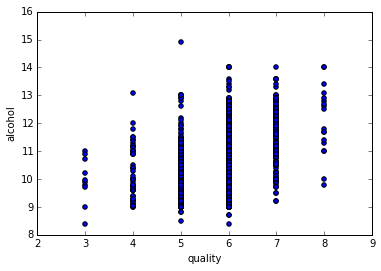

In [12]:
# make scatterplot
# we notice the data would be better visualized with a box plot

wine.plot(kind='scatter',x='quality',y='alcohol')

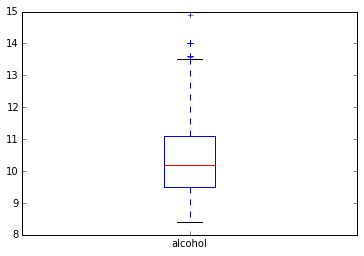

In [13]:
wine.plot(kind='box',x='quality',y='alcohol')

### split, apply and combine

In [2]:
# re-get sample data from uci dataset archive

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

wine = pd.read_csv( url , sep=';' )

In [3]:
from IPython.display import Image

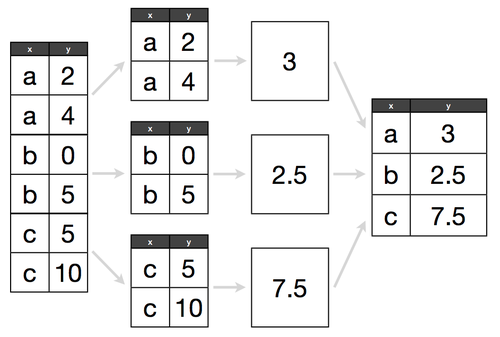

In [4]:
# split df by index -> apply a function -> combine results

Image('http://i.imgur.com/yjNkiwL.png')

In [5]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


In [6]:
# sort by alcohol value, high to low, descending
# inplace=True will write the change to the df
# inplace=True will not output the results

wine.sort_values(by='alcohol',ascending=False,inplace=True)

In [7]:
# make a function which assigns a rank to wine based on alcohol

def ranker(input_df):
    input_df['alc_content_rank'] = np.arange(len(input_df)) + 1
    return input_df

In [8]:
# make a groupby object, groups by quality
# apply the ranker function to a groupby object 

wine = wine.groupby('quality').apply(ranker)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26,60,0.99084,3.70,0.75,14.0,6,3


In [9]:
# count values for the quality variable

wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
# filter only rows where alc_content_rank = 1

wine[wine.alc_content_rank == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16,42,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8,65,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6,11,0.99892,3.48,0.49,11.0,3,1


### cross-tabulation (special case of pivot table)

In [13]:
import io

In [14]:
# create data from a comment

data="""
Sample Animal Intelligence
1 Dog Smart 
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

df = pd.read_table(io.StringIO(data),sep='\s+')
df

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [15]:
# creates a pivot table that is like a frequency counter

pd.crosstab(df.Animal, df.Intelligence, margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
